# ML Project - Fall 2023 (S403011)

In order to improve its user's experience,  programmer's best friend **Stackoverflow** has begun to process internal data from the past 15 years.
Unfortunately, some data are missing; the tag i.e. the subject of a post is nowhere to be found for some posts.
To help them, you are mandated as **machine learning** (ML) specialists.


Your task is to build the most accurate ML models for predicting the missing tag of a post.
In order to do so, Stackoverflow has provided you with a data set of posts and associated tags.
As ML specialists, your main challenge will be to process correctly these text data using **natural language processing** (NLP) methods.

![Logo of Stackoverflow](https://pbs.twimg.com/profile_images/1220067947798024192/30eZhfxx_400x400.png)

In [16]:
import pandas as pd # for manipulate data frame
import matplotlib.pyplot as plt # for plots

In [17]:
data = pd.read_csv("Project/train.csv")

the dataset *train.csv* has **28000** stackoverflow **posts** associated with a **tags** that indicates the "programming language".
The dataset has 3 columns :
- Id
- post
- tags

There are 20 differents tags.
Therefore this is a multiclass classification problem.

The full dataset has **40000** examples. The remaining **12000** posts are the test set.

In [18]:
data.shape

(28000, 3)

In [19]:
data.head()

,Id,post,tags
0,1,what is causing this behavior in our c# datet...,c#
1,3,have dynamic html load as if it was in an ifra...,asp.net
2,4,how to convert a float value in to min:sec i ...,objective-c
3,5,.net framework 4 redistributable just wonderi...,.net
4,6,trying to calculate and print the mean and its...,python


In [ ]:
# NA data
data.isnull().sum()

In [ ]:
# Barplot of the count of tags
plt.figure(figsize=(10,4))
data.tags.value_counts().plot(kind='bar');
tags_unique = pd.unique(data["tags"])

In [20]:
#example of data
print(data["post"][0])
print(data["tags"][0])

what is causing this behavior  in our c# datetime type  <pre><code>[test] public void sadness() {    var datetime = datetime.utcnow;    assert.that(datetime  is.equalto(datetime.parse(datetime.tostring()))); } </code></pre>   failed :   <pre><code> expected: 2011-10-31 06:12:44.000  but was:  2011-10-31 06:12:44.350 </code></pre>   i wish to know what is happening behind the scenes in tostring() etc to cause this behavior.    edit after seeing jon s answer :   <pre><code>[test] public void newsadness() {     var datetime = datetime.utcnow;     assert.that(datetime  is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre>   result :   <pre><code>expected: 2011-10-31 12:03:04.161 but was:  2011-10-31 06:33:04.161 </code></pre>   same result with capital and small  o  . i m reading up the docs  but still unclear.
c#


We observe that the post are in english and need to be preprocess before fitting them into a model.
We need to :
- remove the html formatting
- remove the unnecessary spaces
- remove the stopwords
- remove the undesirable characters
- remplace the capital letters by lower case letters

## Text Formatting

In [21]:
# Library for text formatting
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

replace_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

# function to formatting the text
def preprocess_text(text):
    
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_space.sub(' ', text) # replace replace_space symbols by space in text
    text = bad_symbols.sub('', text) # delete symbols which are in bad_symbols from text
    text = ' '.join(word for word in text.split() if word not in stopwords) # delete stopwords from text
    return text

In [23]:
data["post"] = data["post"].apply(preprocess_text) # for some reason you have to do it twice

In [24]:
print(data["post"][0])
print(data["tags"][0])

causing behavior c# datetime type test public void sadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring failed expected 20111031 061244000 20111031 061244350 wish know happening behind scenes tostring etc cause behavior edit seeing jon answer test public void newsadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring result expected 20111031 120304161 20111031 063304161 result capital small reading docs still unclear
c#


## Model Fitting

In [6]:

from sklearn.feature_extraction.text import CountVectorizer # for transforming text into vector of count.

*CountVectorizer* transform an input of text into a sparse matrix of words count.
e.g:
"This is an example and this example is for a machine learning project"
|This|is |an |example|and|for|a  |machine|learning|project|
|----|---|---|-------|---|---|---|-------|--------|-------|
|2   |2  |1  |2      |1  |1  |1  |1      |1       |1      |

In [25]:
text = ["this is an example and this example is for a machine learning project",
        "this is another example"]
count_vect = CountVectorizer()
count_example = count_vect.fit_transform(text)
count_array = count_example.toarray()
df = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())
print(df)

   an  and  another  example  for  is  learning  machine  project  this
0   1    1        0        2    1   2         1        1        1     2
1   0    0        1        1    0   1         0        0        0     1


### Word Cloud

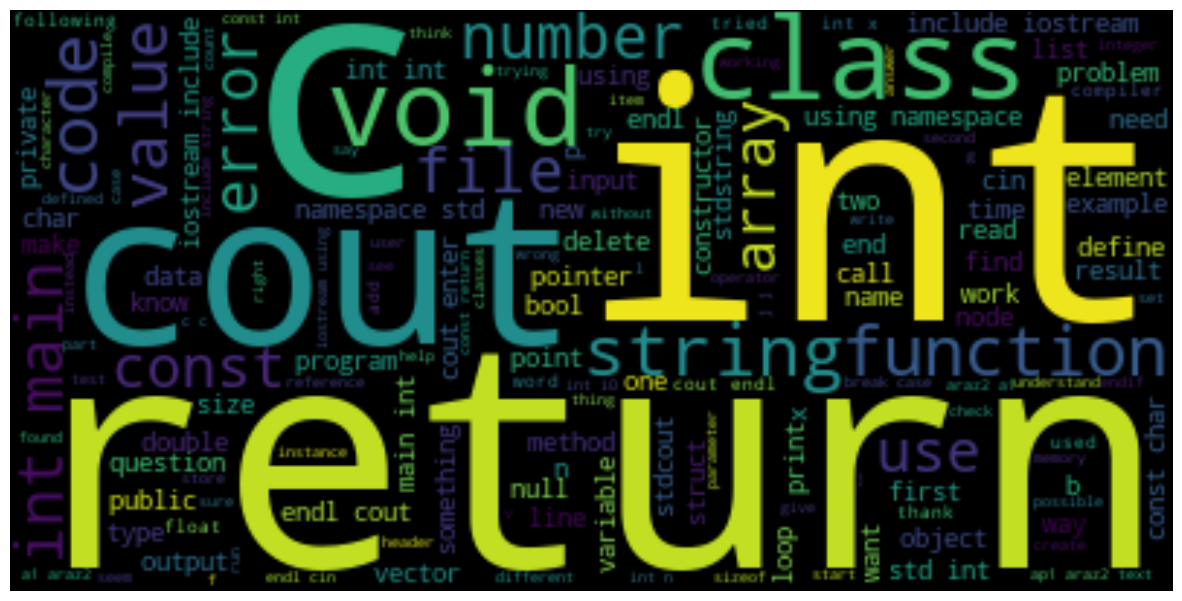

In [121]:
from wordcloud import WordCloud

consolidated = ' '.join( 
    word for word in data['post'][data['tags'] == "c++"].astype(str)) 
wordCloud = WordCloud() 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # for illustration purpose; the test set is on Kaggle.

x_train, x_test, y_train, y_test = train_test_split(data["post"],  
                                                    data["tags"],  
                                                    test_size=0.3)

We use pipeline to first transform the text data and then to fit the model.

The metric for all the models is the accuracy :
$$ 	\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

### Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = Pipeline([("vect", CountVectorizer()),
                       ("naivebayes", MultinomialNB())])
naive_bayes.fit(x_train, y_train)

# accuracy of naive bayes classifier
print(naive_bayes.score(x_train, y_train))
print(naive_bayes.score(x_test, y_test))

0.9018877551020408
0.7152380952380952


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer # for term-frequency-inverse document-frequency transformation

logit_regr = Pipeline([("vect", CountVectorizer()),
                       # works better with tfid without the need to increase max_iter
                       #("tfid", TfidfTransformer()),
                       ("logit", LogisticRegression(multi_class="multinomial", solver = "sag", max_iter=50))])
logit_regr.fit(data["post"], data["tags"])

# accuracy of logistic regression
print(logit_regr.score(data["post"], data["tags"]))
print(logit_regr.score(x_test, y_test))


0.9113571428571429
0.9117857142857143


## Kaggle

Beside your work on python, a ML competition is hosted on **Kaggle**.

https://www.kaggle.com/competitions/ml-unige-fall-2023-stackoverflow-classification

There are two different types of rankings on Kaggle:

- **Public Leaderboard**: 
Each day you may submit up to two prediction files. 
These predictions are directly evaluated on $30\%$ of the test data. 
This score is shown on the Public Leaderboard and gives you an indication of the accuracy of your prediction. 
The Public Leaderboard **does not count** for the final evaluation.

- **Private Leaderboard**: 
Before the end of the Kaggle competition, you can choose one of your submissions for the final evaluation.
After the end of the competition, the predictions of this submission are evaluated on the $70\%$ remaining test data, resulting in the Private Leaderboard.
The final scores in the Private Leaderboard determine the accuracy of your predictions and the competition winners.
You should choose a final prediction that you believe performs best on new data, which might not necessarily be the best-scoring Public Leaderboard prediction.

### Test Data

To asses the performance of your model, you are provided with a test dataset. This dataset has **12000** posts but without the corresponding tags.
To upload your prediction on **Kaggle** you have to:
- Build a ML model on python
- Make some predictions using this model
- Writing your predictions on a csv file
- Uploading it on Kaggle

In [42]:
# loading the test data
data_test = pd.read_csv("Project/test.csv")

In [43]:
data_test.head()
# no tags

,Id,post
0,2,have dynamic html load as if it was in an ifra...
1,12,how to install .ipa on jailbroken iphone over ...
2,13,dynamic textbox text - asp.net i m trying to ...
3,19,distance between 2 or more drop pins i was do...
4,22,clarification required on responsibility of $...


The column **Id** is very important for **Kaggle** to verify your solution.

In [12]:
# formating your text data 
data_test["post"] = data_test["post"].apply(preprocess_text) # do it twice for some reasons

In [13]:
#from sklearn.linear_model import LogisticRegression

#logit_regr = Pipeline([("vect", CountVectorizer()),
#                       ("tfid", TfidfTransformer()),
#                       ("logit", LogisticRegression(multi_class="multinomial", solver = "sag", max_iter = 50))])
#logit_regr.fit(data["post"], data["tags"])

y_pred = logit_regr.predict(data_test["post"])
solution = data_test
solution.insert(2, "tags", y_pred) # make sure that the column of predictions is called tags

In [14]:
solution.head()

,Id,post,tags
0,2,dynamic html load iframe aspnet 40 site users ...,html
1,12,install ipa jailbroken iphone air apple certif...,iphone
2,13,dynamic textbox text aspnet trying separate pr...,asp.net
3,19,distance 2 drop pins small assignment finding ...,iphone
4,22,clarification required responsibility scope an...,angularjs


In [15]:
 # don't forget to put index = False otherwise the csv file will have one more column
solution.to_csv("Project/solution_1.csv", index = False)

After that, you can upload your solution on **Kaggle** and check the accuracy of your model on the test set.

You can upload maximum **2** solutions each day.

## Conclusion

It's now your turn to try ML models with diffent hyper parameters.
Your goal is to obtain the best accuracy for the test set.

Also, we you use other text formatting techniques to have a better accuracy.

**Good Luck !!!**